  ## Clustering With K Means

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\srile\Downloads\house price csv.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
plt.scatter(df.LotFrontage,df['SalePrice'])
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')

Text(11.472222222222216, 0.5, 'SalePrice')

In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sample DataFrame
df = pd.DataFrame({
    'LotFrontage': [80, 70, 75, np.nan, 60, 90, 85],
    'SalePrice': [200000, 250000, 220000, 230000, np.nan, 300000, 275000]
})

# Handle Missing Values
df = df.dropna()  # or use df.fillna(df.mean(), inplace=True)

# Normalize Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['LotFrontage', 'SalePrice']])

# Apply KMeans Clustering
km = KMeans(n_clusters=3, random_state=42, n_init=10)
y_predicted = km.fit_predict(df_scaled)

print(y_predicted)


[2 0 2 1 1]


In [9]:
df['cluster']=y_predicted
df.head()

,LotFrontage,SalePrice,cluster
0,80.0,200000.0,2
1,70.0,250000.0,0
2,75.0,220000.0,2
5,90.0,300000.0,1
6,85.0,275000.0,1


In [10]:
km.cluster_centers_

array([[-1.41421356,  0.02769244],
       [ 1.06066017,  1.06615889],
       [-0.35355339, -1.08000511]])

In [13]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.LotFrontage,df1['SalePrice'],color='green')
plt.scatter(df2.LotFrontage,df2['SalePrice'],color='red')
plt.scatter(df3.LotFrontage,df3['SalePrice'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.legend()

## Preprocessing using min max scaler

In [15]:
scaler = MinMaxScaler()

scaler.fit(df[['SalePrice']])
df['SalePrice'] = scaler.transform(df[['SalePrice']])

scaler.fit(df[['LotFrontage']])
df['LotFrontage'] = scaler.transform(df[['LotFrontage']])

In [16]:
df.head()

,LotFrontage,SalePrice,cluster
0,0.50,0.00,2
1,0.00,0.50,0
2,0.25,0.20,2
5,1.00,1.00,1
6,0.75,0.75,1


In [17]:
plt.scatter(df.LotFrontage,df['SalePrice'])

In [18]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['LotFrontage','SalePrice']])
y_predicted

array([0, 2, 0, 1, 1])

In [19]:
df['cluster']=y_predicted
df.head()

,LotFrontage,SalePrice,cluster
0,0.50,0.00,0
1,0.00,0.50,2
2,0.25,0.20,0
5,1.00,1.00,1
6,0.75,0.75,1


In [20]:
km.cluster_centers_

array([[0.375, 0.1  ],
       [0.875, 0.875],
       [0.   , 0.5  ]])

In [21]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.LotFrontage,df1['SalePrice'],color='green')
plt.scatter(df2.LotFrontage,df2['SalePrice'],color='red')
plt.scatter(df3.LotFrontage,df3['SalePrice'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

## Elbow plot

In [25]:
sse = []
k_rng = range(1,5)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['LotFrontage','SalePrice']])
    sse.append(km.inertia_)

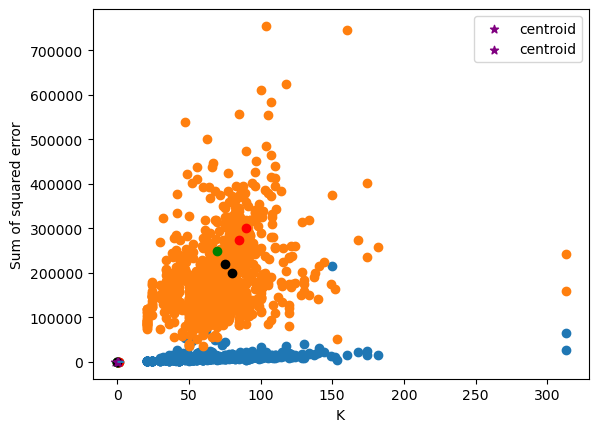

In [26]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show()

1.Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2.Figure out if any preprocessing such as scaling would help here
3.Draw elbow plot and from that figure out optimal value of k